In [11]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

# from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [13]:
all_data = pd.read_csv("all_data_preprocessed.csv")

all_data_X = all_data.loc[:, all_data.columns != 'totals_totalTransactionRevenue']
all_data_y = all_data['totals_totalTransactionRevenue']

all_data = pd.concat([all_data_X, all_data_y], axis=1)
all_data.columns

Index(['channelGrouping', 'date', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'fullVisitorId',
       'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_networkDomain', 'geoNetwork_subContinent', 'totals_hits',
       'totals_pageviews', 'totals_sessionQualityDim',
       'totals_transactionRevenue', 'trafficSource_medium',
       'trafficSource_source', 'visitNumber', 'visitStartTime',
       'totals_totalTransactionRevenue'],
      dtype='object')

In [14]:
all_data = all_data.sort_values(by=['totals_totalTransactionRevenue'])

### Pair-wise Correlation

In [15]:
corr = all_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [16]:
sns.set(style="white")

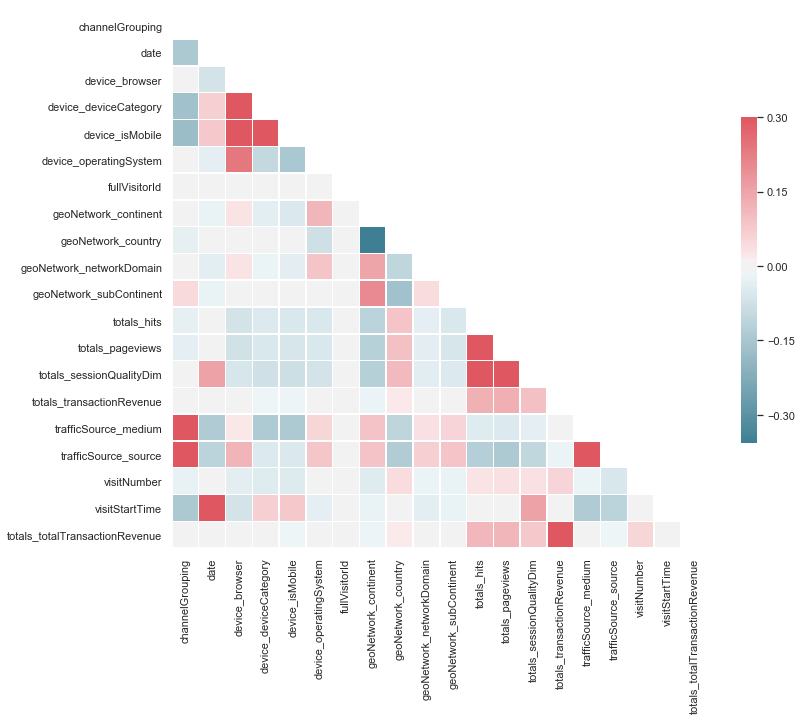

In [20]:
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})